In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch



from datetime import date
from collections import Counter as count
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
test = pd.read_csv('test_final.csv.zip')
train = pd.read_csv('train_final.csv.zip')

<ipython-input-3-80a7b506f16a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=y_data, palette='hls')


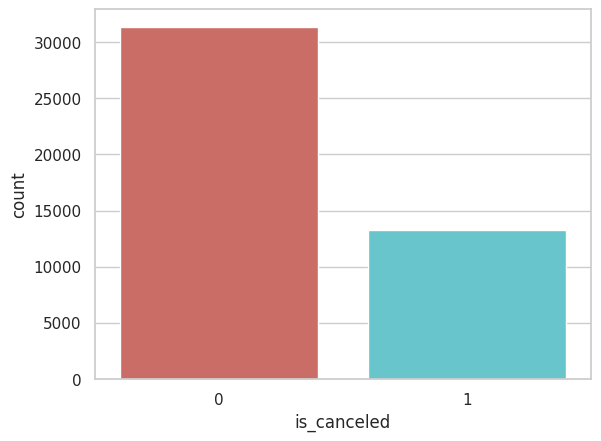

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(train['is_canceled'])
sns.countplot(x='is_canceled', data=y_data, palette='hls')
plt.show()

In [ ]:
def filter_str(df):
    data = df.iloc[0, :]
    index = []

    for i, j in zip(data.index, data.values):
        if type(j) != type('a'):
            index.append(i)
    return index

def filter_not_str(df):
    data = df.iloc[0, :]
    index = []

    for i, j in zip(data.index, data.values):
        if type(j) == type('a'):
            index.append(i)
    return index

In [ ]:
train['reservation_status_date'] = train['reservation_status_date'].apply(lambda x: date.fromisoformat(x).toordinal())

In [ ]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,736008
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,736246
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,735854
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,735940
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,735981


In [ ]:
# работает так себе
labelencoder = LabelEncoder()
for i in filter_not_str(train):
    train.loc[:, i] = labelencoder.fit_transform(train.loc[:, i])
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,1,0,3,2016,3,7,12,0,2,2,...,4,5,0,0,0,2,81.0,1,0,736008
1,0,1,50,2016,9,47,18,1,2,2,...,0,0,0,0,0,2,93.6,0,2,736246
2,0,0,14,2015,11,37,7,1,5,2,...,5,5,0,0,0,0,166.0,0,3,735854
3,0,0,18,2015,2,50,6,2,0,2,...,0,0,0,0,0,2,107.0,0,0,735940
4,0,1,263,2016,11,40,29,2,4,2,...,0,0,0,0,0,2,100.3,0,0,735981


In [ ]:
y = train['is_canceled']
train.drop(columns=['is_canceled'], inplace=True)

In [ ]:
df_train = (train - train.mean()) / train.std()

In [ ]:
x_train, x_test, y_val, y_test =  train_test_split(df_train, y, stratify=y, random_state=42, shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"{i}" for i in range(df_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_val)

RandomForestClassifier(random_state=0)

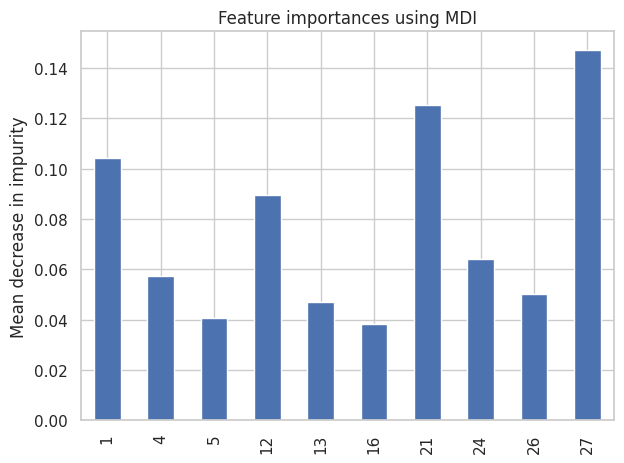

In [ ]:
import numpy as np
import pandas as pd

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances[abs(forest_importances - forest_importances.max()) < 3 * forest_importances.std()]

fig, ax = plt.subplots()
forest_importances.plot.bar()#(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
name_of_columns = df_train.iloc[:, list(map(int, forest_importances.index))].columns

In [ ]:
train_cleaned = df_train.iloc[:, list(map(int, forest_importances.index))]

In [ ]:
ros = RandomOverSampler()

# Применение увеличения выборки к данным
train_cleaned_resampled, y_resampled = ros.fit_resample(train_cleaned, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_cleaned_resampled, y_resampled, test_size=0.25)

x_train = torch.FloatTensor(np.array(x_train).astype('float64'))
x_test = torch.FloatTensor(np.array(x_test.astype('float64')))
y_train = torch.LongTensor(np.array(y_train).astype('int32'))
y_test = torch.LongTensor(np.array(y_test).astype('int32'))

In [ ]:
x_train.shape, y_train.shape

(torch.Size([47031, 10]), torch.Size([47031]))

In [ ]:
class MyNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MyNet, self).__init__()
        self.fc1 = torch.nn.Linear(x_train.shape[-1], n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()

        # self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        # self.act2 = torch.nn.Sigmoid()

        # self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        # self.act3 = torch.nn.Sigmoid()

        self.fc4 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act4 = torch.nn.Sigmoid()

        self.fc5 = torch.nn.Linear(n_hidden_neurons, 2)



    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)

        # x = self.fc2(x)
        # x = self.act2(x)

        # x = self.fc3(x)
        # x = self.act3(x)

        x = self.fc4(x)
        x = self.act4(x)

        x = self.fc5(x)

        return x

my_net = MyNet(200)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_net.parameters(), lr=1.0e-3)
batch_size = 100

test_accuracy_history = []
test_loss_history = []


for epoch in range(10000):
    order = np.random.permutation(len(x_train))
    for start_index in range(0, len(x_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        x_batch = x_train[batch_indexes]#.to(device)
        y_batch = y_train[batch_indexes]#.to(device)

        preds = my_net.forward(x_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = my_net.forward(x_test)
    test_loss_history.append(loss(test_preds, y_test).data)

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
    test_accuracy_history.append(accuracy)

    print(accuracy)

теперь тестовые

In [ ]:
test['reservation_status_date'] = test['reservation_status_date'].apply(lambda x: date.fromisoformat(x).toordinal())

In [ ]:
for i in filter_not_str(test):
    test.loc[:, i] = labelencoder.fit_transform(test.loc[:, i])
test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,73,2016,5,28,6,0,2,1,0.0,...,0,0,0,0,0,2,107.10,0,0,736127
1,0,37,2015,10,43,24,2,5,1,1.0,...,0,0,0,0,0,2,87.78,0,0,735902
2,0,190,2017,0,14,6,2,3,2,0.0,...,0,0,0,0,0,2,88.40,0,0,736236
3,0,287,2016,1,35,24,1,4,2,0.0,...,1,1,1,0,0,2,76.71,0,0,736205
4,1,386,2016,10,43,20,1,3,2,0.0,...,0,0,0,0,0,3,49.00,0,0,736221


In [72]:
test_cleaned = test.iloc[:, list(map(int, forest_importances.index))]
test_cleaned.shape

(23525, 10)

In [ ]:
test_cleaned = (test_cleaned - test_cleaned.mean()) / test_cleaned.std()
test_cleaned.head()

In [75]:
x = torch.FloatTensor(np.array(test_cleaned).astype('float64'))

In [76]:
test_preds = my_net.forward(x).argmax(dim=1)

In [81]:
pd.DataFrame(test_preds, columns=['is_canceled']).to_csv('predict.csv')